<a href="https://colab.research.google.com/github/Bortak10/POSI/blob/main/Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5

## Introduction

### Logistic Regression

**Logistic Regression** is a statistical model used to predict the probability of an event occurring (e.g., $ Y = 1 $) based on one or more explanatory variables $$ X_1, X_2, \ldots, X_n $$

In contrast to linear regression, logistic regression models the probability in such a way that it always stays within the range $[0, 1]$.

It uses the so-called **logistic (sigmoidal) function**, defined as:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$


### Sigmoidal Function

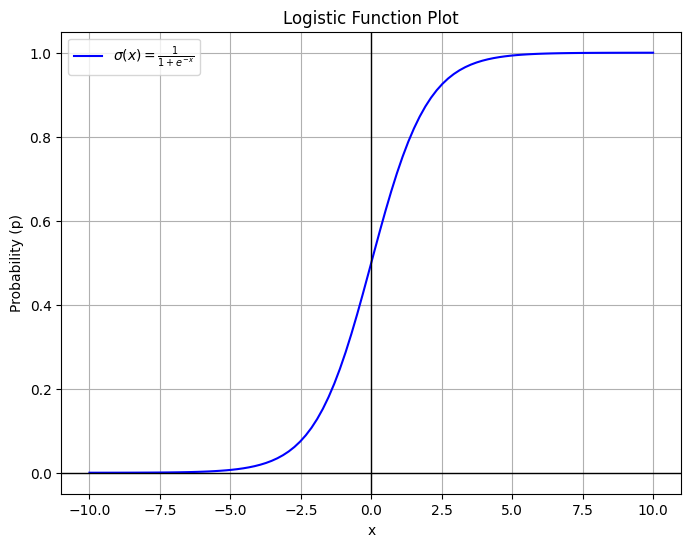

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Values of x
x = np.linspace(-10, 10, 100)

# Calculate the logistic function values
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Logistic Function Plot')
plt.xlabel('x')
plt.ylabel('Probability (p)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Example of Logistic Regression Calculation

Suppose we want to predict the probability that a customer will purchase a product ($Y = 1$),
based on the number of pages viewed ($X$).

The logistic regression model is given by:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Let the model parameters be:
$$
\beta_0 = -4, \quad \beta_1 = 0.8
$$

<br>

### 1. Calculate the probability of purchase when the customer viewed $X = 5$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 5)}} = \frac{1}{1 + e^{-(0)}} = \frac{1}{2} = 0.5
$$

Thus, the model predicts that the **probability of purchase is 50%**.

<br>

### 2. For $X = 8$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 8)}} = \frac{1}{1 + e^{-2.4}} \approx 0.916
$$

This means that a customer who viewed 8 pages has about **91.6% chance of purchas**


### Difference Between Linear and Logistic Regression

**1. Linear Regression**

- Used to predict **continuous values**.  
- The model takes the form:
$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon
$$
- The result $y$ can take any real value.

**2. Logistic Regression**

- Used to predict the **probability of an event**, most often binary classification.  
- The model takes the form:
$$
p = P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$
- The result $p$ always lies within the range $[0, 1]$.

<br><br>

**Summary at a glance**:

| Feature              | Linear Regression        | Logistic Regression      |
|----------------------|--------------------------|--------------------------|
| Dependent variable type | Continuous               | Binary (0/1)             |
| Model output         | Any real number          | Probability [0,1]        |
| Activation function  | None / Linear            | Sigmoid                 |


### Example of Logistic Regression in Python Code


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


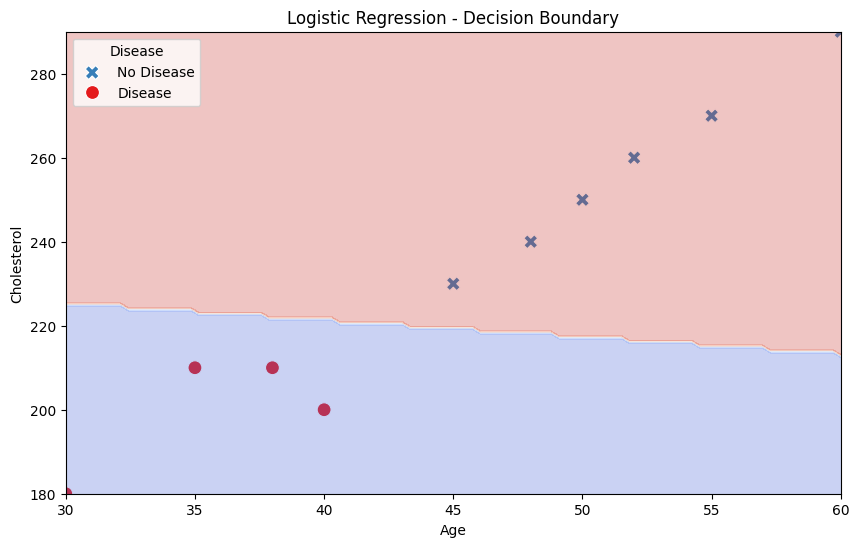

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Creating sample data
data = {
    'Age': [45, 50, 38, 60, 55, 40, 30, 35, 48, 52],
    'Cholesterol': [230, 250, 210, 290, 270, 200, 180, 210, 240, 260],
    'Has_Disease': [1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]  # Independent variables
y = df['Has_Disease']  # Dependent variable

# Split the data into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict results on the test set
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of data distribution with disease label
sns.scatterplot(x='Age', y='Cholesterol', hue='Has_Disease', style='Has_Disease', data=df, palette="Set1", s=100)

# Generate prediction values based on the model
xx, yy = np.meshgrid(np.linspace(X['Age'].min(), X['Age'].max(), 100),
                     np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary of logistic regression
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Logistic Regression - Decision Boundary")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Disease', loc='upper left', labels=["No Disease", "Disease"])
plt.show()


### Metrics for Model Evaluation in Classification Tasks

# 1. Accuracy

Accuracy measures the percentage of correct predictions made by the model. If we have:

- \(TP\) – True Positives  
- \(TN\) – True Negatives  
- \(FP\) – False Positives  
- \(FN\) – False Negatives  

accuracy is defined as:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

# 2. Precision

Precision tells us what percentage of observations predicted as positive are actually positive:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

<br>

# 3. Recall / Sensitivity

Sometimes it is also useful to calculate recall, which measures the model's ability to detect true positives:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

<br>

# 4. F1-score

The F1-score is a metric that combines both precision and recall into a single value. It is the **harmonic mean** of precision and recall, accounting for both false positives and false negatives.

Definition:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

where:

- $\text{Precision} = \frac{TP}{TP + FP}$
- $\text{Recall} = \frac{TP}{TP + FN}$

F1-score is particularly useful when classes are imbalanced, as it accounts for both precision and recall.

<br><br>

| Metric | Definition | Formula |
|--------|------------|---------|
| **Accuracy** | The percentage of correctly classified cases | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ |
| **Precision** | The percentage of true positives among those predicted as positive | $$\text{Precision} = \frac{TP}{TP + FP}$$ |
| **Recall / Sensitivity** | The percentage of true positives detected by the model | $$\text{Recall} = \frac{TP}{TP + FN}$$ |
| **Specificity** | The percentage of true negatives detected by the model | $$\text{Specificity} = \frac{TN}{TN + FP}$$ |
| **F1-score** | The harmonic mean of precision and recall | $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ |

### Example of Using Metrics for Logistic Regression in Python Code


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(123)
data = {
    'Age': np.random.randint(30, 70, size=100),
    'Cholesterol': np.random.randint(180, 300, size=100),
    'Has_Disease': np.random.randint(0, 2, size=100)  # random 0 or 1
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]
y = df['Has_Disease']

# Split the data into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the results on the test set
y_pred = model.predict(X_test)

# Check model accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Model accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')


Model accuracy: 75.00%
Precision: 70.59%
Recall: 100.00%
F1-score: 82.76%


## Exercise
For the dataset `heart_disease_uci.csv`, perform DEA analysis and logistic regression for the attribute `num`.

### Column Descriptions

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type  
  - Values: `[typical angina, atypical angina, non-anginal, asymptomatic]`
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results  
  - Values: `[normal, stt abnormality, lv hypertrophy]`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina  
  - Values: `[True, False]`
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**:  
  - Values: `[normal, fixed defect, reversible defect]`
- **num**: The predicted attribute


Make sure to:
- Check for missing data,
- Check for correlation between features,
- Look for outliers,
- Validate the model using metrics,
- Visualize the data and results.


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from google.colab import files
files.upload()

df = pd.read_csv('heart_disease_uci(in).csv')


duplicates = df.duplicated(subset=["id"])
print("Number of duplicates:",duplicates.sum())
print()
print("Basic information about the dataset")
display(df.info())
print()

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent })
print(missing_df[missing_df['Missing Count'] > 0])


Saving heart_disease_uci(in).csv to heart_disease_uci(in) (13).csv
Number of duplicates: 0

Basic information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None


          Missing Count  Percentage
trestbps             59    6.413043
chol                 30    3.260870
fbs                  90    9.782609
restecg               2    0.217391
thalch               55    5.978261
exang                55    5.978261
oldpeak              62    6.739130
slope               309   33.586957
ca                  611   66.413043
thal                486   52.826087


In [132]:
del df['ca']
del df['thal']
del df['slope']

df["trestbps"] = df["trestbps"].fillna(df["trestbps"].median())
df["chol"] = df["chol"].fillna(df["chol"].median())
df = df.dropna(subset=["fbs", "restecg", "exang", "oldpeak", "thalch"])

print("Cleaned information about the dataset")
display(df.info())
print()

print("Table of null values after update")
display(df.isnull().sum())
print()

Cleaned information about the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        770 non-null    int64  
 1   age       770 non-null    int64  
 2   sex       770 non-null    object 
 3   dataset   770 non-null    object 
 4   cp        770 non-null    object 
 5   trestbps  770 non-null    float64
 6   chol      770 non-null    float64
 7   fbs       770 non-null    object 
 8   restecg   770 non-null    object 
 9   thalch    770 non-null    float64
 10  exang     770 non-null    object 
 11  oldpeak   770 non-null    float64
 12  num       770 non-null    int64  
 13  Disease   770 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 90.2+ KB


None


Table of null values after update


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


Boxplot of age:



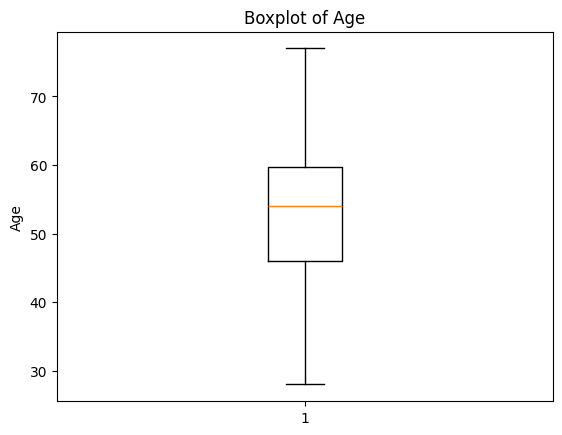


Boxplot of Resting Blood Pressure:



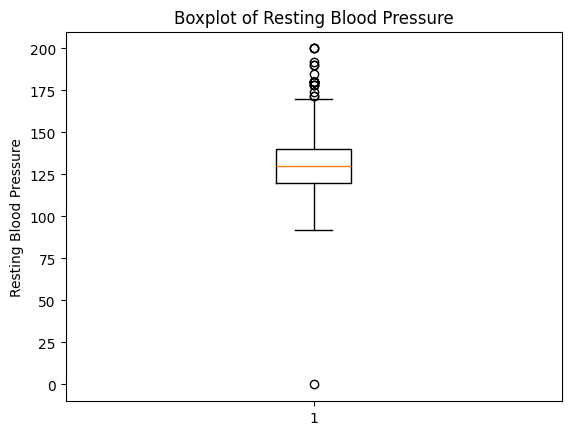


Boxplot of Cholesterol:



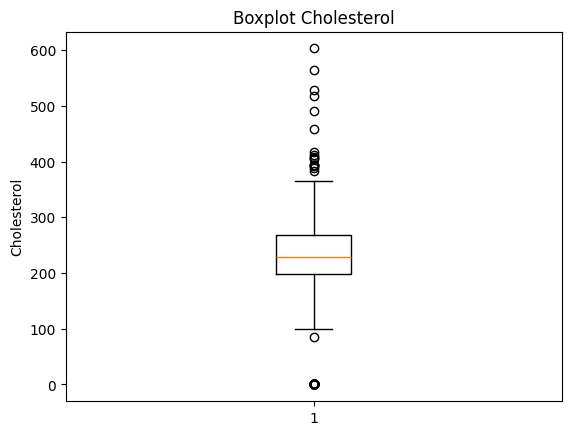


Boxplot of Maximum Heart Rate:



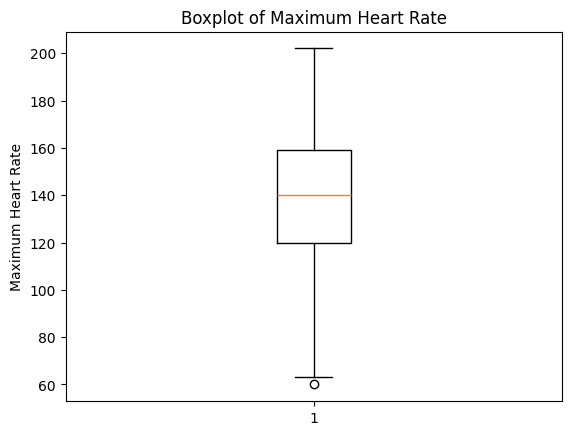


      id  age     sex        dataset               cp  trestbps   chol    fbs  \
14    15   52    Male      Cleveland      non-anginal     172.0  199.0   True   
83    84   68    Male      Cleveland      non-anginal     180.0  274.0   True   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
172  173   59  Female      Cleveland     asymptomatic     174.0  249.0  False   
183  184   59    Male      Cleveland   typical angina     178.0  270.0  False   
188  189   54    Male      Cleveland  atypical angina     192.0  283.0  False   
201  202   64  Female      Cleveland     asymptomatic     180.0  325.0  False   
213  214   66  Female      Cleveland     asymptomatic     178.0  228.0   True   
231  232   55  Female      Cleveland     asymptomatic     180.0  327.0  False   
338  339   39    Male        Hungary  atypical angina     190.0  241.0  False   
375  376   45  Female        Hungary  atypical angina     180.0  223.0  False   
387  388   46    Male      

None

In [133]:
print("Boxplot of age:")
print()
plt.boxplot(df["age"].dropna())
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()
print()

print("Boxplot of Resting Blood Pressure:")
print()
plt.boxplot(df["trestbps"].dropna())
plt.title("Boxplot of Resting Blood Pressure")
plt.ylabel("Resting Blood Pressure")
plt.show()
print()

print("Boxplot of Cholesterol:")
print()
plt.boxplot(df["chol"].dropna())
plt.title("Boxplot Cholesterol")
plt.ylabel("Cholesterol")
plt.show()
print()

print("Boxplot of Maximum Heart Rate:")
print()
plt.boxplot(df["thalch"].dropna())
plt.title("Boxplot of Maximum Heart Rate")
plt.ylabel("Maximum Heart Rate")
plt.show()
print()

Q1 = df["trestbps"].quantile(0.25)
Q3 = df["trestbps"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["trestbps"] < lower_bound) | (df["trestbps"] > upper_bound)]
print(outliers)
print()

Q1_1 = df["chol"].quantile(0.25)
Q3_1 = df["chol"].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

outliers_1 = df[(df["chol"] < lower_bound_1) | (df["chol"] > upper_bound_1)]
print(outliers_1)
print()

outlier_indices = outliers.index.union(outliers_1.index)
df = df.drop(outlier_indices)

display(df.info())

In [105]:
print()
print("Table of the statistical data for all numerical columns:")
display(df.drop(columns="id").describe())
print()
print("Sex of the patients:")
display(df['sex'].value_counts())
print()
print("Place of Study:")
display(df['dataset'].value_counts())
print()
print("Type of Chest Pain:")
display(df['cp'].value_counts())
print()
print("Fasting Blood Sugar > 120:")
display(df['fbs'].value_counts())
print()
print("Fresting Electrocardiographic Results:")
display(df['restecg'].value_counts())
print()
print("Exercise-induced Angina:")
display(df['exang'].value_counts())
print()
print("Probability of Heart Disease")
display(df['num'].value_counts())


Table of the statistical data for all numerical columns:


,age,trestbps,chol,thalch,oldpeak,num
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,52.289764,130.971654,239.788976,141.537008,0.820472,0.765354
std,9.538952,15.716208,44.439547,25.019673,0.985713,1.047784
min,28.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,45.000000,120.000000,210.000000,122.000000,0.000000,0.000000
50%,53.000000,130.000000,234.000000,143.000000,0.300000,0.000000
75%,59.000000,140.000000,269.000000,160.500000,1.500000,1.000000
max,77.000000,170.000000,355.000000,202.000000,3.800000,4.000000



Sex of the patients:


,count
sex,
Male,474
Female,161



Place of Study:


,count
dataset,
Cleveland,284
Hungary,259
VA Long Beach,92



Type of Chest Pain:


,count
cp,
asymptomatic,306
atypical angina,151
non-anginal,144
typical angina,34



Fasting Blood Sugar > 120:


,count
fbs,
False,545
True,90



Fresting Electrocardiographic Results:


,count
restecg,
normal,396
lv hypertrophy,157
st-t abnormality,82



Exercise-induced Angina:


,count
exang,
False,407
True,228



Probability of Heart Disease


,count
num,
0,346
1,171
2,54
3,49
4,15


Text(0.5, 1.0, 'Resting Electrocardiographic Results')

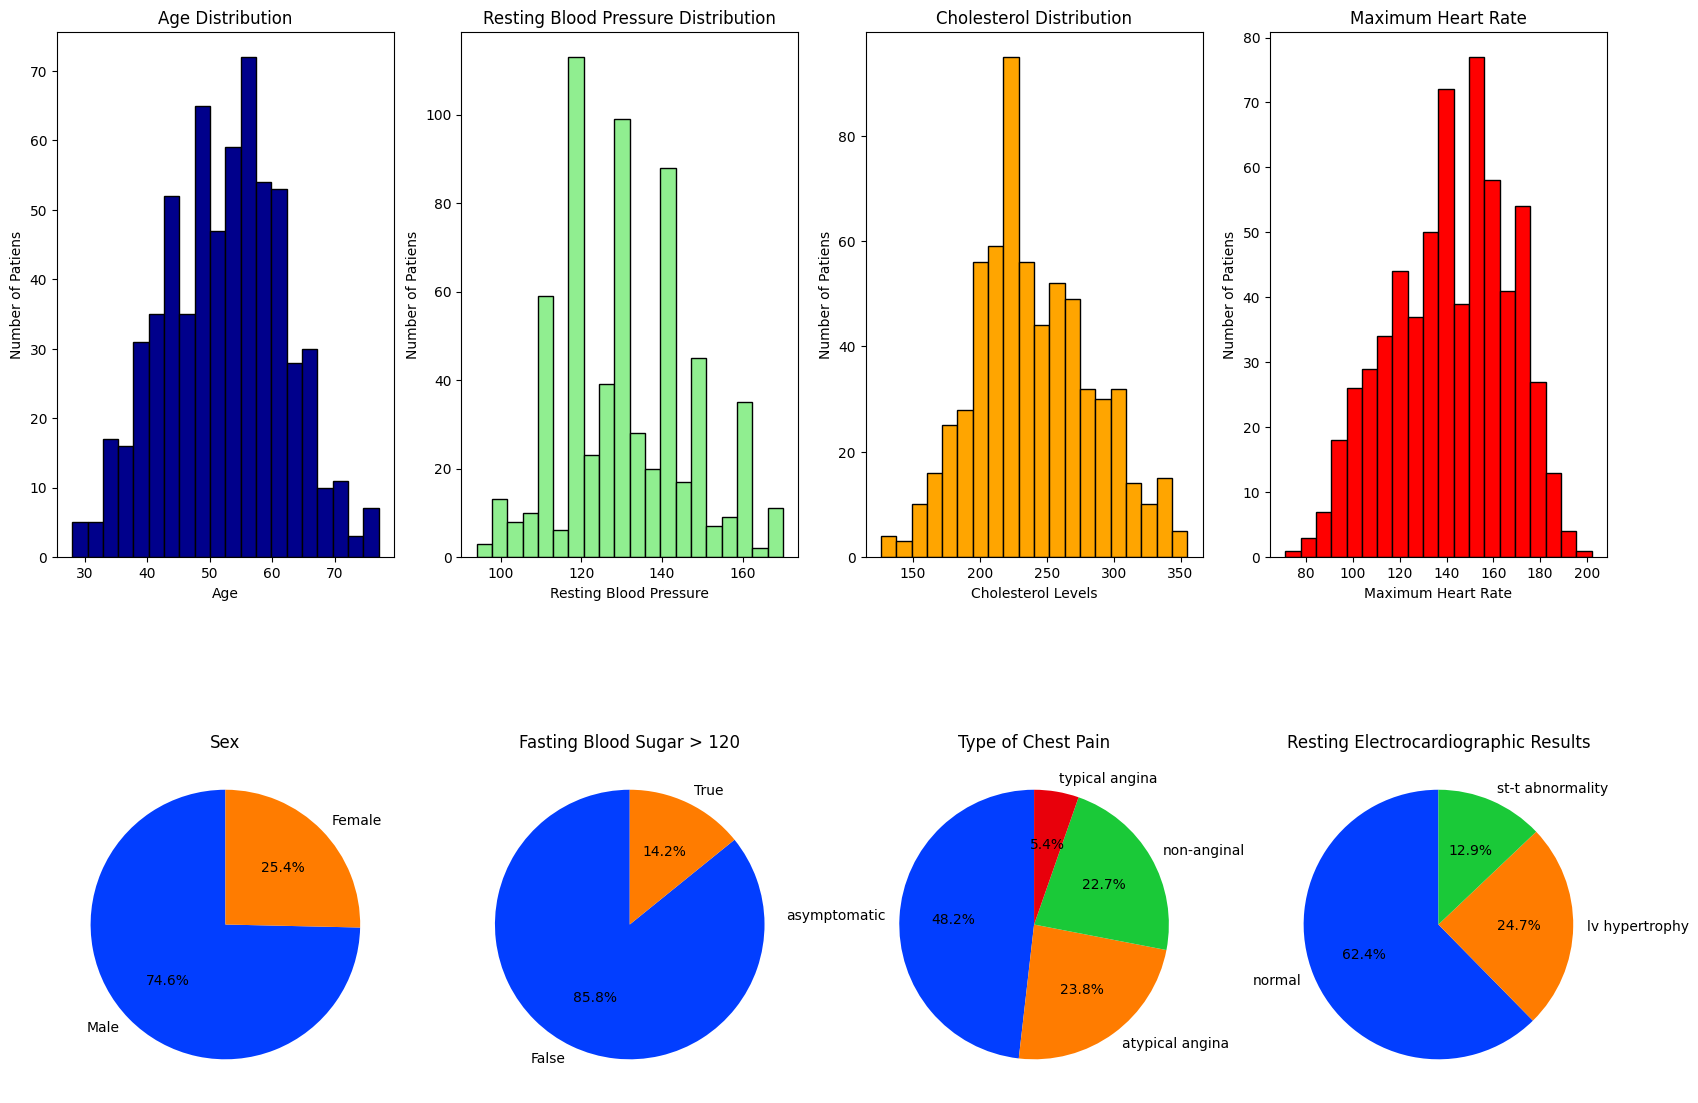

In [92]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15))

axes[0,0].hist(df['age'],bins=20, color='darkblue', edgecolor='black')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Number of Patiens")

axes[0,1].hist(df['trestbps'],bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title("Resting Blood Pressure Distribution")
axes[0, 1].set_xlabel("Resting Blood Pressure")
axes[0, 1].set_ylabel("Number of Patiens")

axes[0,2].hist(df['chol'],bins=20, color='orange', edgecolor='black')
axes[0, 2].set_title("Cholesterol Distribution")
axes[0, 2].set_xlabel("Cholesterol Levels")
axes[0, 2].set_ylabel("Number of Patiens")

axes[0,3].hist(df['thalch'],bins=20, color='red', edgecolor='black')
axes[0, 3].set_title("Maximum Heart Rate")
axes[0, 3].set_xlabel("Maximum Heart Rate")
axes[0, 3].set_ylabel("Number of Patiens")

df["sex"].value_counts().plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("bright"), ylabel='')
axes[1, 0].set_title("Sex")

df["fbs"].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("bright"), ylabel='')
axes[1, 1].set_title("Fasting Blood Sugar > 120")

df["cp"].value_counts().plot(kind='pie', ax=axes[1, 2], autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("bright"), ylabel='')
axes[1, 2].set_title("Type of Chest Pain")

df["restecg"].value_counts().plot(kind='pie', ax=axes[1, 3], autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("bright"), ylabel='')
axes[1, 3].set_title("Resting Electrocardiographic Results")

Heatmap of Correlation



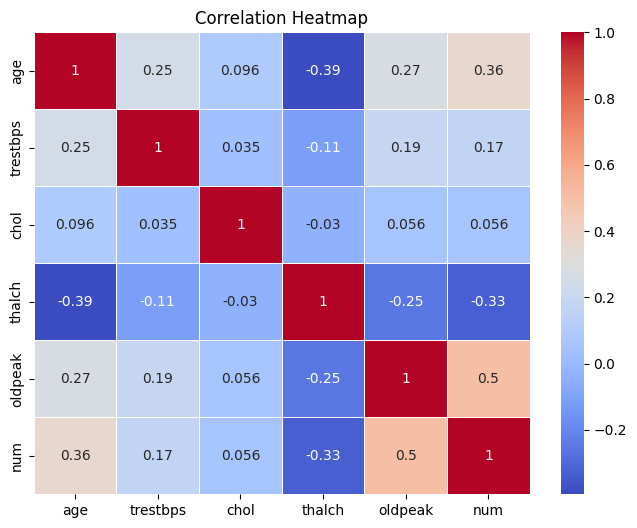

In [95]:
print("Heatmap of Correlation")
print()
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['id']).corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Age vs Cholesterol



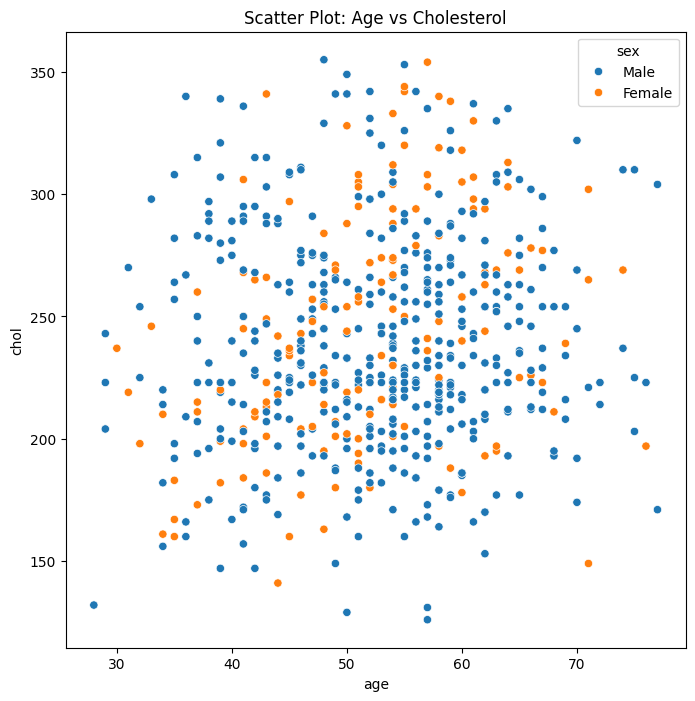


Age vs Resting Blood Pressure



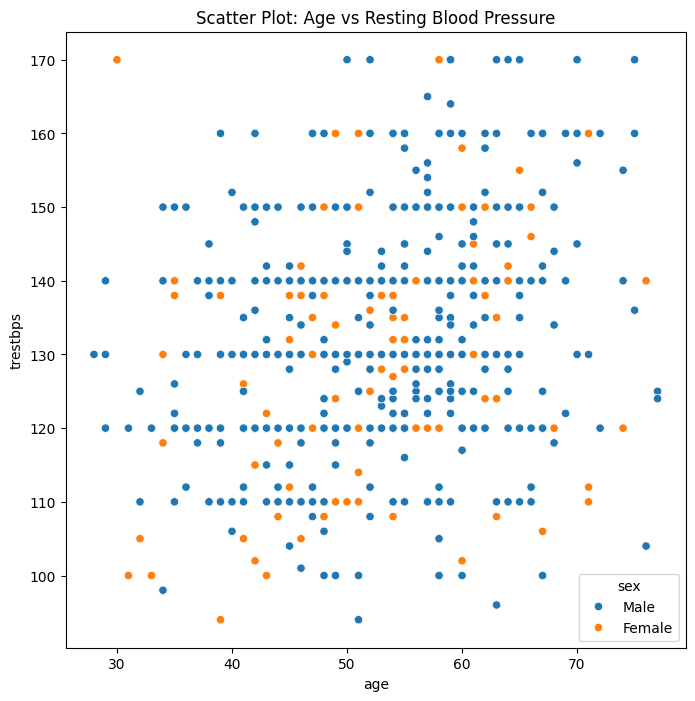


Age vs Maximum Heart Rate



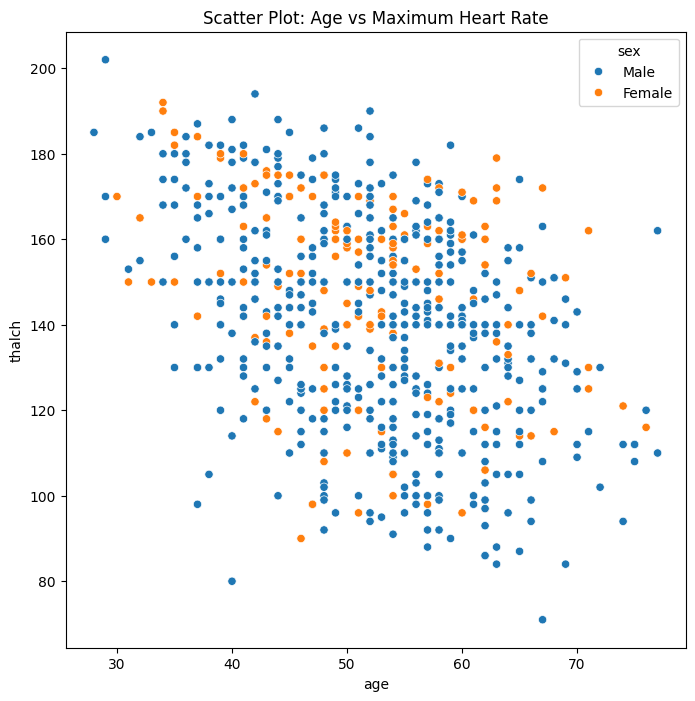


Age vs Cholesterol



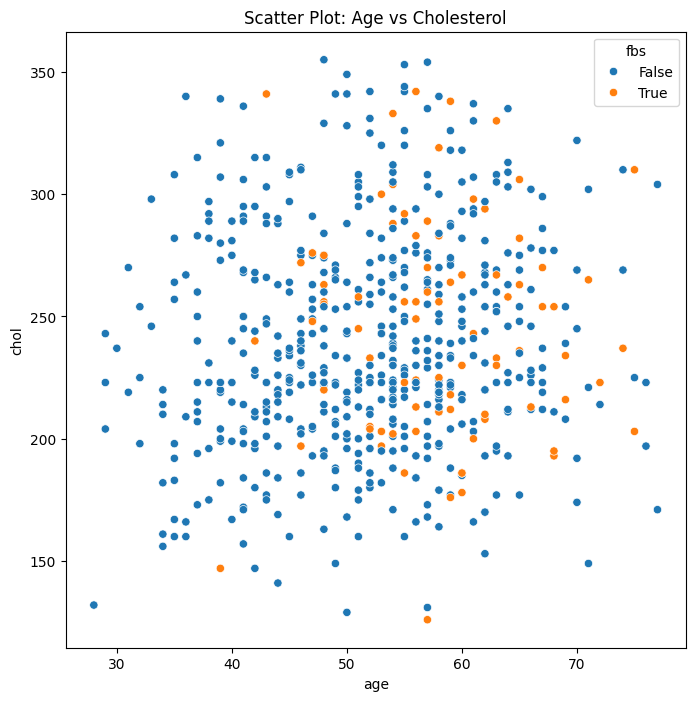


Age vs Resting Blood Pressure



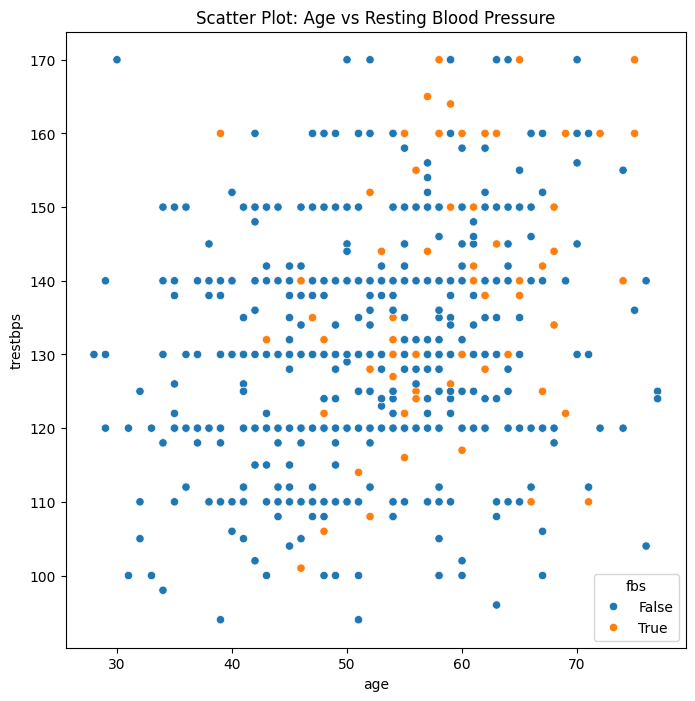


Age vs Maximum Heart Rate



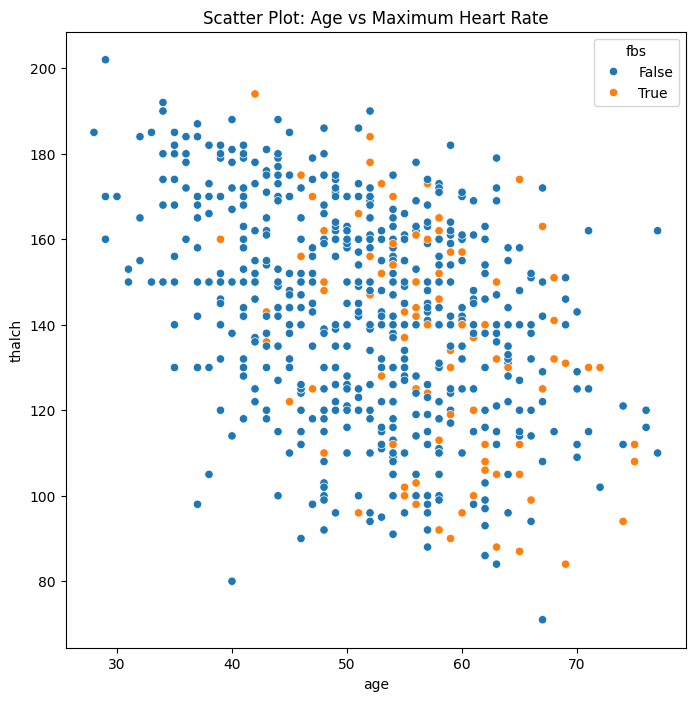


Age vs Cholesterol



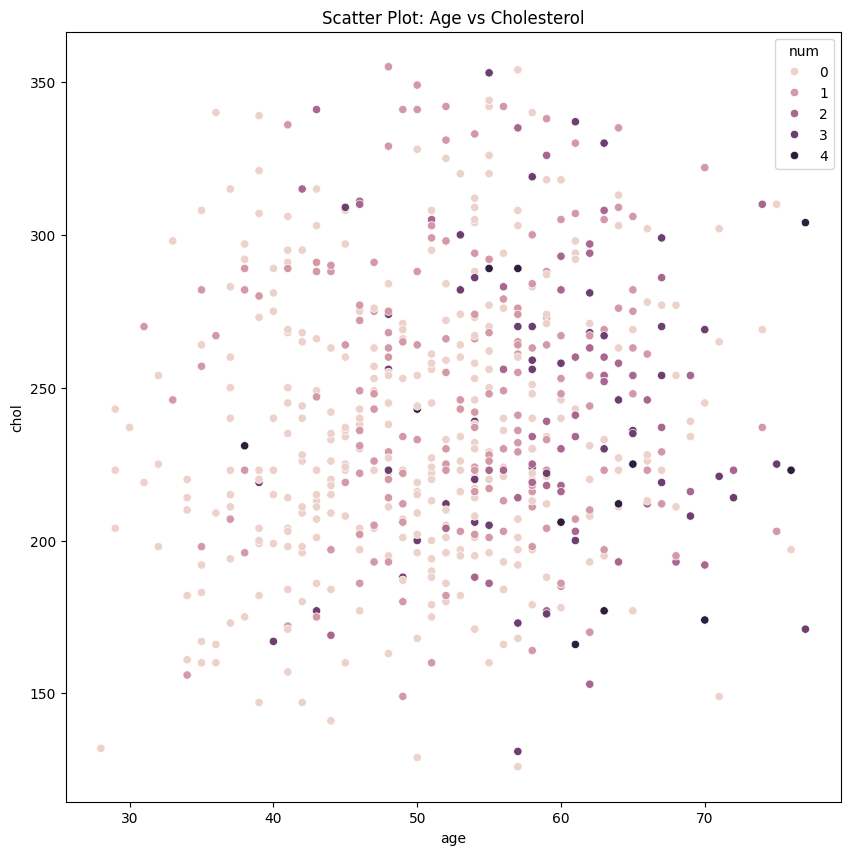


Age vs Resting Blood Pressure



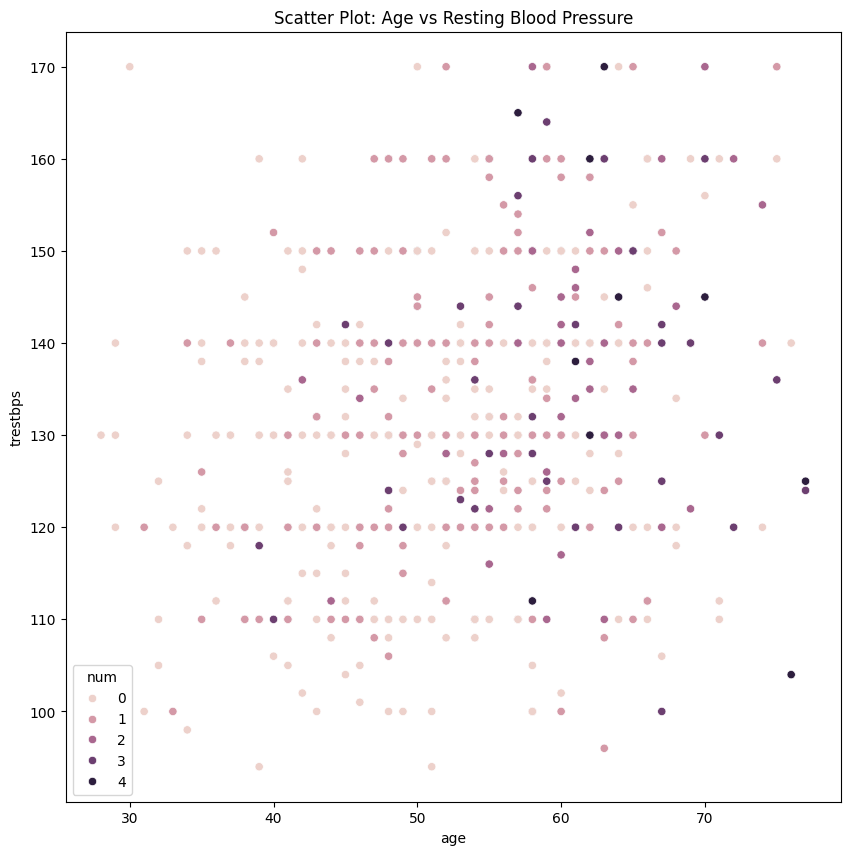


Age vs Maximum Heart Rate



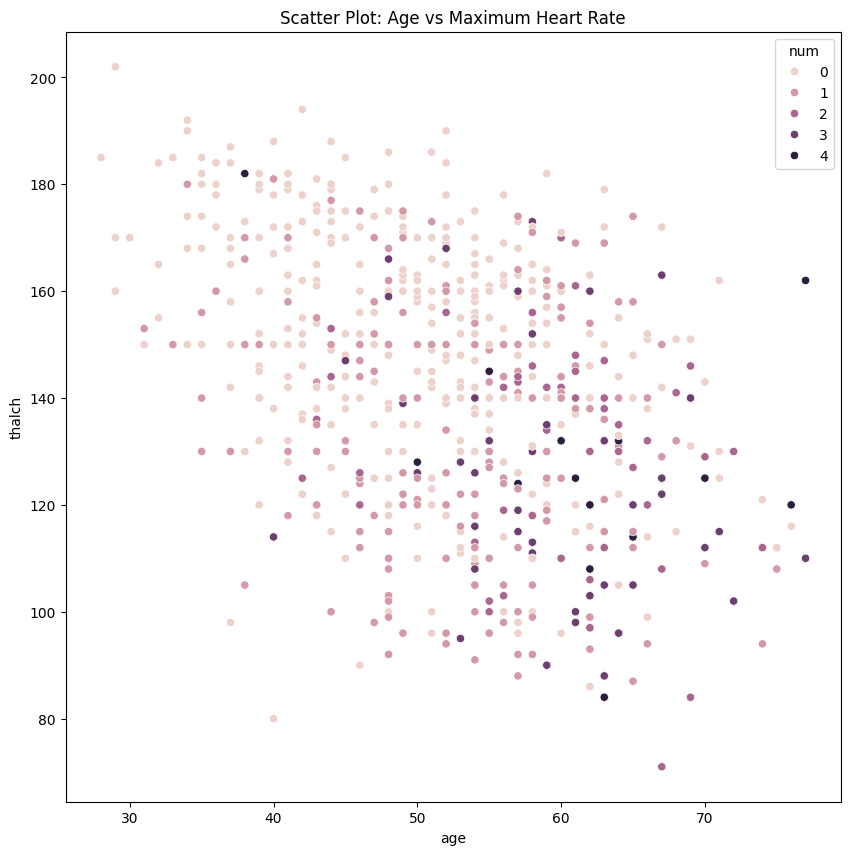

In [110]:
print("Age vs Cholesterol")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="age", y="chol", hue="sex", data=df,)
plt.title("Scatter Plot: Age vs Cholesterol")
plt.show()
print()

print("Age vs Resting Blood Pressure")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="age", y="trestbps", hue="sex", data=df,)
plt.title("Scatter Plot: Age vs Resting Blood Pressure")
plt.show()
print()

print("Age vs Maximum Heart Rate")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="age", y="thalch", hue="sex", data=df,)
plt.title("Scatter Plot: Age vs Maximum Heart Rate")
plt.show()
print()

print("Age vs Cholesterol")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="age", y="chol", hue="fbs", data=df,)
plt.title("Scatter Plot: Age vs Cholesterol")
plt.show()
print()

print("Age vs Resting Blood Pressure")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="age", y="trestbps", hue="fbs", data=df,)
plt.title("Scatter Plot: Age vs Resting Blood Pressure")
plt.show()
print()

print("Age vs Maximum Heart Rate")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="age", y="thalch", hue="fbs", data=df,)
plt.title("Scatter Plot: Age vs Maximum Heart Rate")
plt.show()
print()

print("Age vs Cholesterol")
print()
plt.figure(figsize=(10,10))
sns.scatterplot(x="age", y="chol", hue="num", data=df,)
plt.title("Scatter Plot: Age vs Cholesterol")
plt.show()
print()

print("Age vs Resting Blood Pressure")
print()
plt.figure(figsize=(10,10))
sns.scatterplot(x="age", y="trestbps", hue="num", data=df,)
plt.title("Scatter Plot: Age vs Resting Blood Pressure")
plt.show()
print()

print("Age vs Maximum Heart Rate")
print()
plt.figure(figsize=(10,10))
sns.scatterplot(x="age", y="thalch", hue="num", data=df,)
plt.title("Scatter Plot: Age vs Maximum Heart Rate")
plt.show()
print()

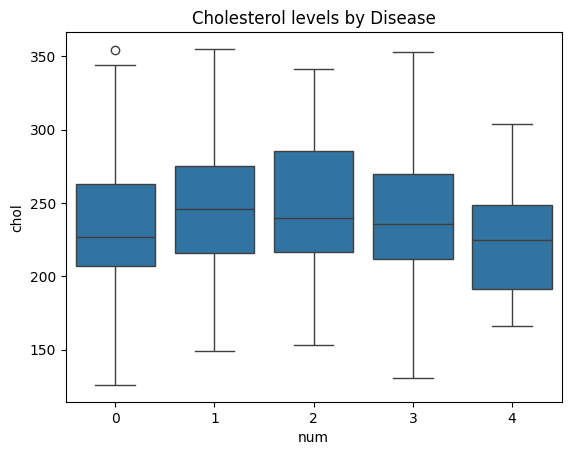

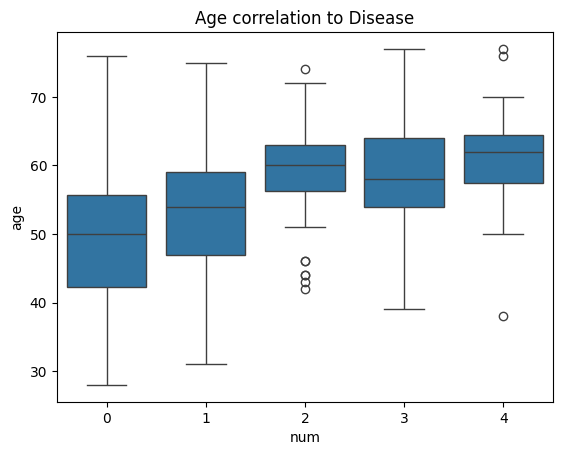

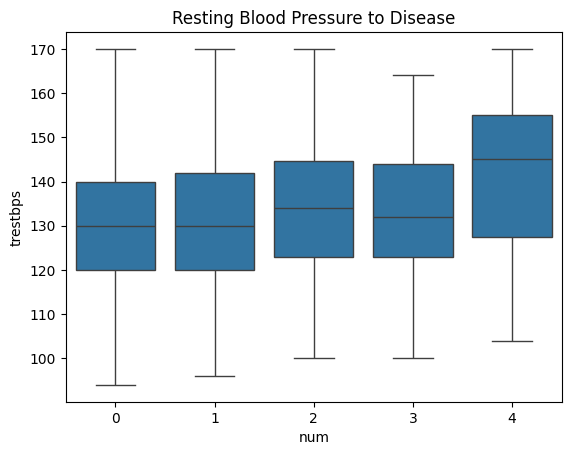

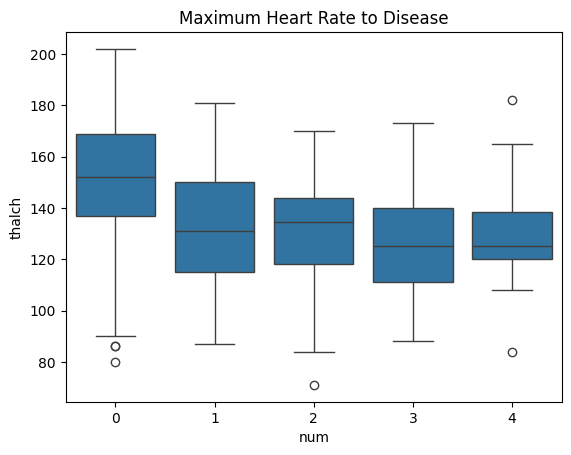

In [128]:
sns.boxplot(x='num', y='chol', data=df, )
plt.title("Cholesterol levels by Disease")
plt.show()
print()

sns.boxplot(x='num', y='age', data=df)
plt.title("Age correlation to Disease")
plt.show()
print()

sns.boxplot(x='num', y='trestbps', data=df)
plt.title("Resting Blood Pressure to Disease")
plt.show()
print()

sns.boxplot(x='num', y='thalch', data=df)
plt.title("Maximum Heart Rate to Disease")
plt.show()
print()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


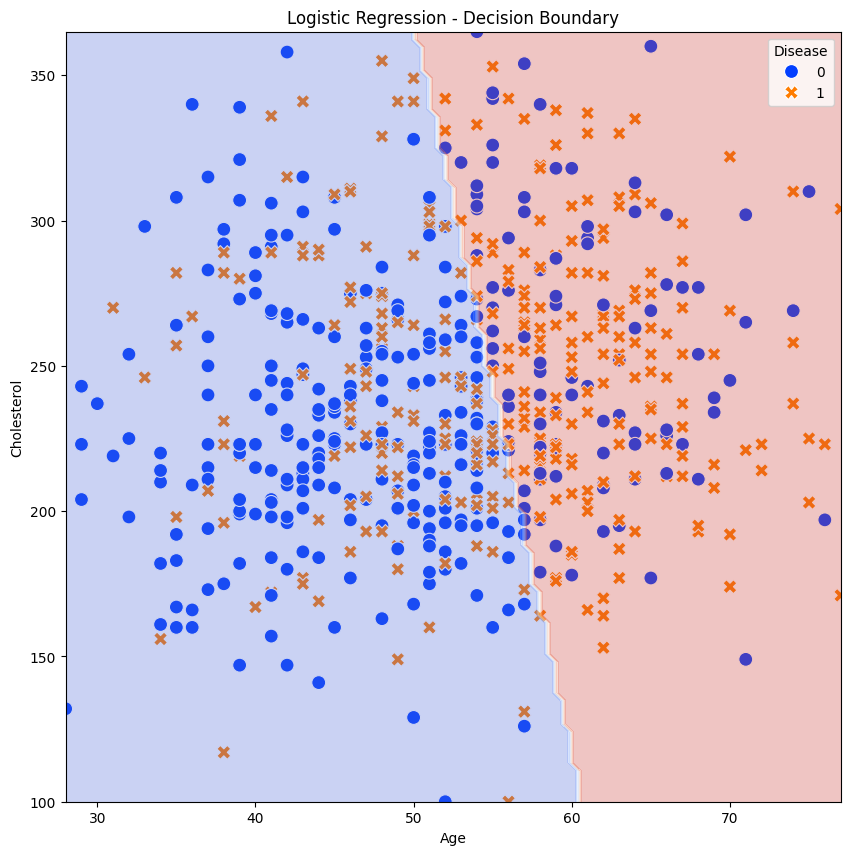


Model accuracy: 63.36%
Precision: 64.52%
Recall: 60.61%
F1-score: 62.50%


In [139]:
df["Disease"] = (df["num"] > 0).astype(int)

X = df[['age', 'chol']]
Y = df['Disease']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

plt.figure(figsize=(10, 10))
sns.scatterplot(x='age', y='chol', hue='Disease', style='Disease', data=df, palette="bright", s=100)

xx, yy = np.meshgrid(np.linspace(X['age'].min(), X['age'].max(), 100),
                     np.linspace(X['chol'].min(), X['chol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Logistic Regression - Decision Boundary")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()
print()

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
f1 = f1_score(Y_test, Y_pred, zero_division=0)

print(f'Model accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')